In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import pytesseract
from craft_text_detector import Craft

In [3]:
ring = cv2.imread("data/WinUSA556/Hornady556_2P_16278_H.jpg")
size = ring.shape[0]  # assumes square image

In [4]:
# Calculate from Hough circle transform
outer_radius = size // 2
inner_radius_factor = 0.5  # 0.70 measured empirically from image

In [5]:
warped = cv2.warpPolar(ring, (size, int(size * math.pi)), (outer_radius, outer_radius), outer_radius, 0)
straightened = cv2.rotate(warped, cv2.ROTATE_90_COUNTERCLOCKWISE)
cropped = straightened[: int(straightened.shape[0] * (1 - inner_radius_factor)), :]

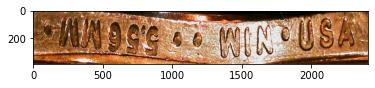

In [13]:
im = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [14]:
plt.imsave("sample.png", im)

In [18]:
output_dir = 'ocr_out'

# create a craft instance
craft = Craft(output_dir=None, crop_type="poly", cuda=False, export_extra=False)


In [19]:
# apply craft text detection and export detected regions to output directory
prediction_result = craft.detect_text(im)

In [20]:
craft.unload_craftnet_model()
craft.unload_refinenet_model()

In [190]:
grey = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

In [200]:
ds = grey#[::4, ::4]

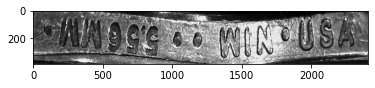

In [201]:
plt.imshow(ds, cmap='gray')

In [206]:
blur = cv2.medianBlur(grey, 3)

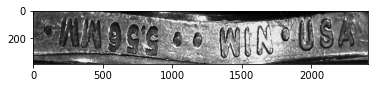

In [207]:
plt.imshow(blur, cmap='gray')

In [225]:
thresh = 255 - cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,111,20)

In [277]:
thresh_blur = cv2.medianBlur(thresh, 13)

In [268]:
erosion = cv2.erode(thresh,np.ones((3,3),np.uint8),iterations = 1)

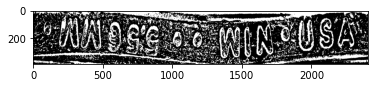

In [276]:
plt.imshow(thresh, cmap='gray')

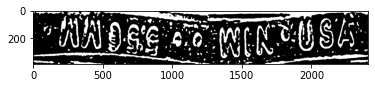

In [278]:
plt.imshow(thresh_blur, cmap='gray')

In [279]:
good_cnts = []
cnts,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
mask = np.zeros(thresh.shape, dtype="uint8")

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cond1 = cv2.contourArea(c) > 2000
    cond2 = True#w < 500
    #cond3 = c
    
    if cond1 and cond2:
        cv2.drawContours(mask, [c], -1, 255, 2)
        good_cnts += [c]
    
    

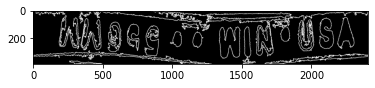

In [280]:
plt.imshow(mask, cmap='gray')

In [283]:
edges = cv2.Canny(mask,240,250, apertureSize=3)

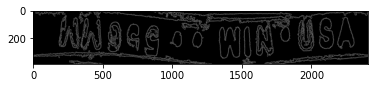

In [284]:
plt.imshow(edges, cmap='gray')

In [146]:
dilation = cv2.dilate(thresh,np.ones((3,3),np.uint8),iterations = 1)

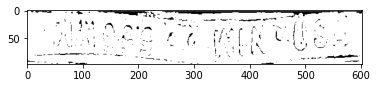

In [147]:
plt.imshow(dilation, cmap='gray')

In [10]:
pytesseract.image_to_string("ocr_out/image_crops/crop_1.png")

''

In [9]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"